The goal of collecting the Stroke Prediction Dataset from Kaggle is to develop a model that can predict the likelihood of a person having a stroke based on their demographic, lifestyle, and health-related information. The dataset contains information on various factors such as age, gender, hypertension, heart disease, smoking status, BMI, etc., which can be used to identify individuals who are at a higher risk of having a stroke.

Therefore, the main goal of this dataset is to develop a predictive model for stroke prediction, which falls under the category of disease prediction. The dataset can be used for various purposes such as identifying risk factors associated with stroke, developing screening tools, and designing interventions to reduce the risk of stroke in high-risk individuals.

In [9]:
#Requried Import 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15,8]
from IPython.display import Image

In [4]:
# Load the dataset
#display all rows and columns in dataset
data = pd.read_csv('healthcare-dataset-stroke-data.csv', index_col=0)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [11]:
#Display Info of Dataset
print("There are",data.shape[0]," Row and ",data.shape[1]," Column in the dataset")


There are 5110  Row and  11  Column in the dataset


In [12]:
#display datatypes for each column
data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [13]:
#Statistical Summaries
#compute the staticial summaries for all varibles
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 9046 to 44679
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 479.1+ KB


In [15]:
#Display the column in the dataset
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [34]:
stat=np.random.randn(100)
x0 = -1
x1 = 1

In [17]:
data.corr(numeric_only = True)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


In [18]:
#compute the sum for all null values
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<Axes: >

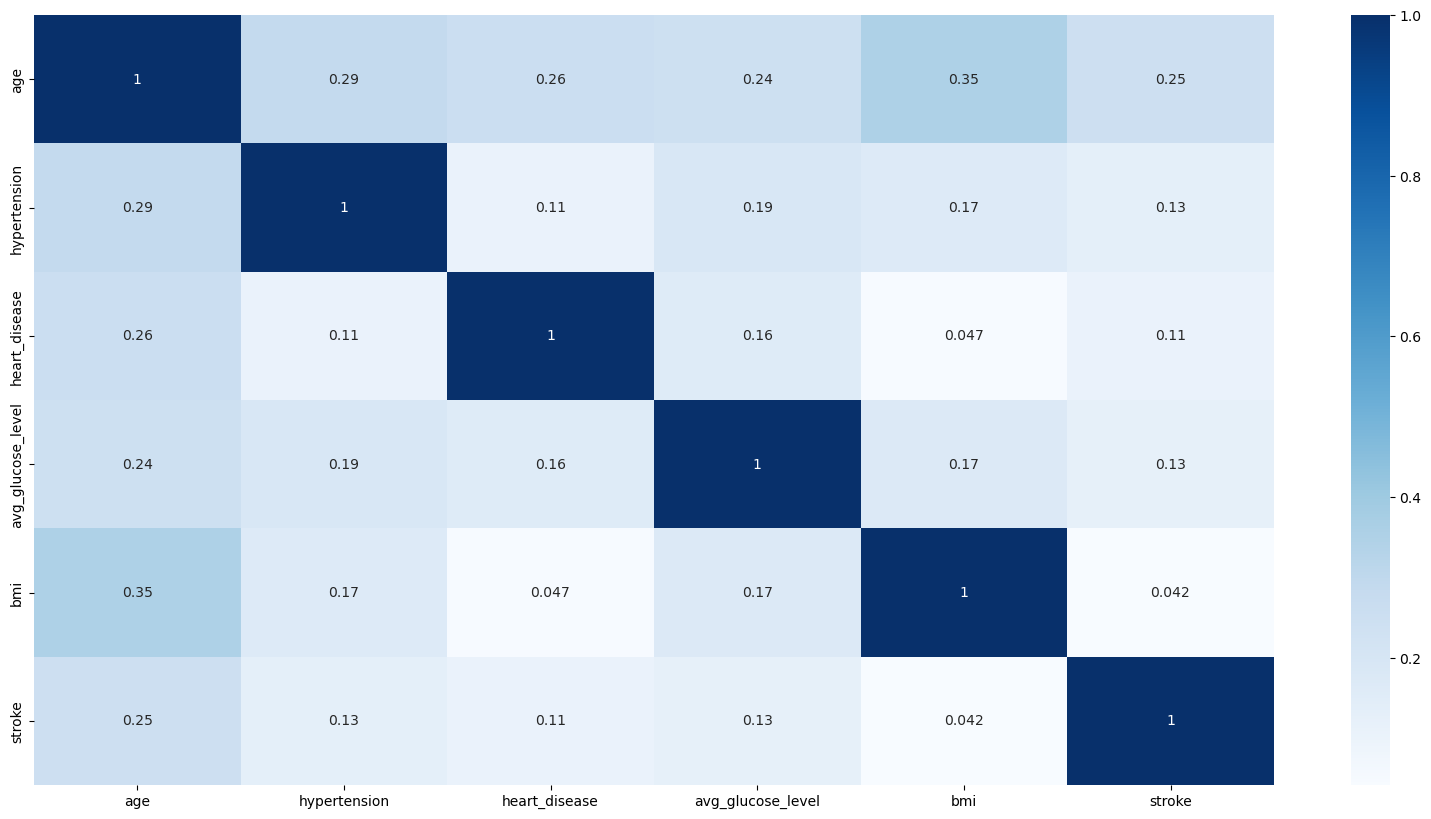

In [115]:
#Corrleation and we descripe it with grapg and if it's became more brighter then there is a relationship between the variables
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(numeric_only = True) , annot=True , cmap="Blues" , linecolor="White")

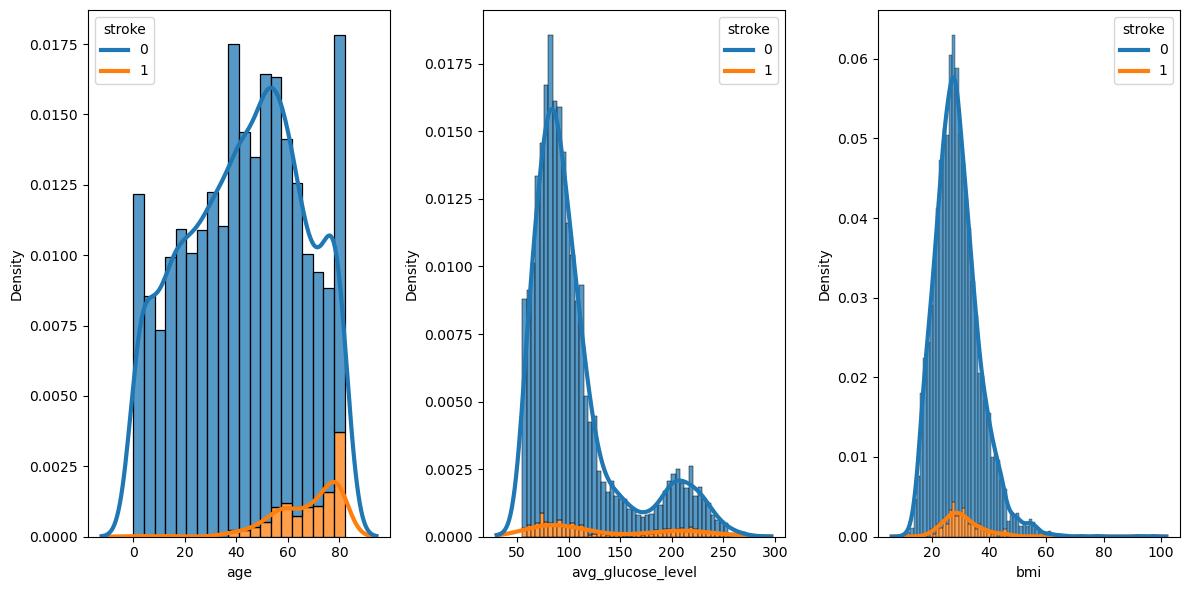

In [52]:
#Variables Distribution - Figure 1
#Histogram Density
column_list = ['age', 'avg_glucose_level', 'bmi']

fig, ax = plt.subplots(1, 3, figsize=(12,6))

for i, col in enumerate(column_list):
  sns.histplot(data=data, x=col, stat='density', hue='stroke', multiple='stack', ax=ax[i])
  sns.kdeplot(data=data, x=col, linewidth=3, hue='stroke', fill=False, multiple='stack', ax=ax[i])

plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

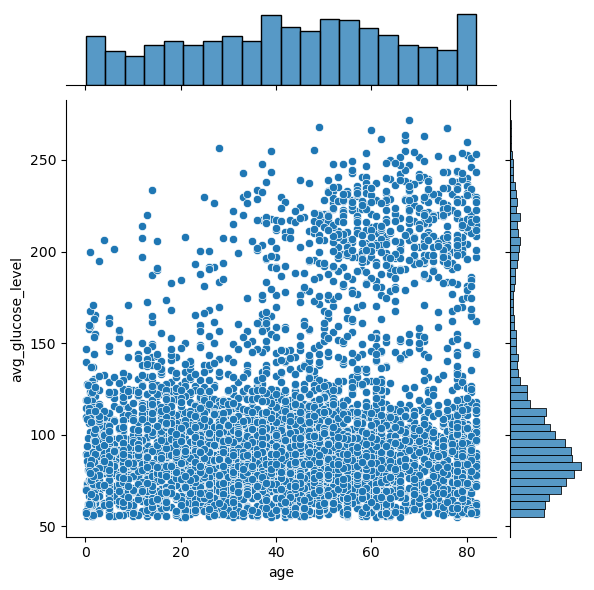

In [51]:
#Variables Distribution - Figure 2
#Scatter Plot
plt.figure(figsize=(12,6))
sns.jointplot(data=data, x='age', y='avg_glucose_level')
plt.show()

In [50]:
#Sample of raw dataset
#Display The First Five Information in Stroke Prediction Dataset
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


Text(0.5, 1.0, 'Distribution of gender')

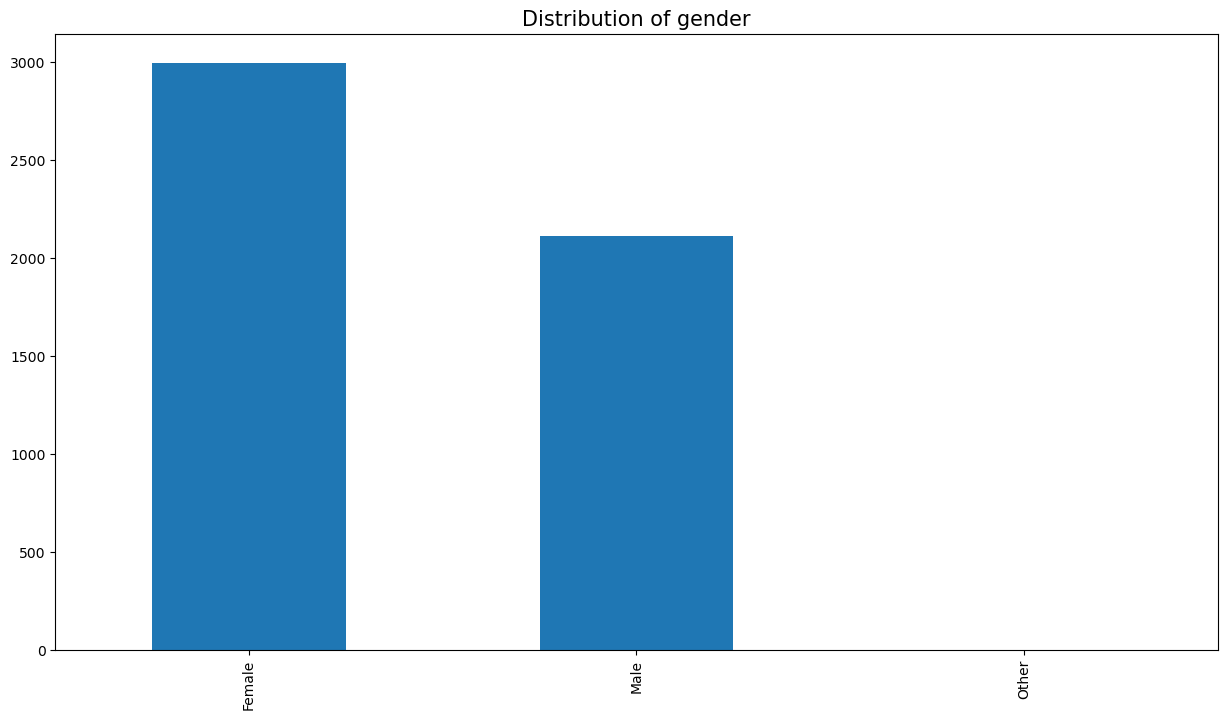

In [53]:
#Variables Distribution - Figure 3
#Bar Plot
data['gender'].value_counts().plot(kind='bar')
print(data['gender'].value_counts())
plt.title('Distribution of gender', fontsize=15)

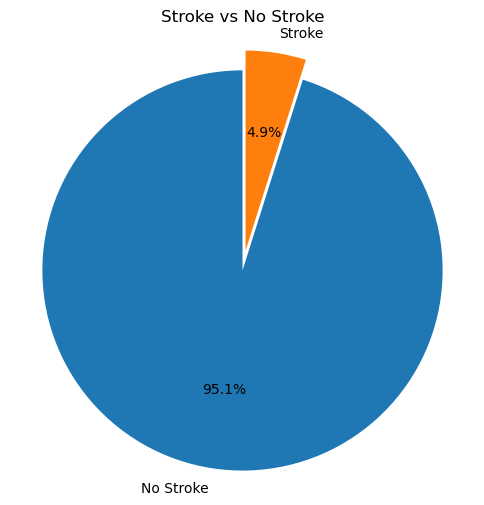

In [82]:
#Variables Distribution - Figure 4
# Create a pie chart
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Stroke vs No Stroke')
plt.show()

In [83]:
#Check For Any Missing Values
data.isnull()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,False,False,False,False,False,False,False,False,False,False,False
51676,False,False,False,False,False,False,False,False,True,False,False
31112,False,False,False,False,False,False,False,False,False,False,False
60182,False,False,False,False,False,False,False,False,False,False,False
1665,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
18234,False,False,False,False,False,False,False,False,True,False,False
44873,False,False,False,False,False,False,False,False,False,False,False
19723,False,False,False,False,False,False,False,False,False,False,False


In [84]:
# Compute the mean and variance of age, bmi, and average glucose level
age_mean = data['age'].mean()
age_var = data['age'].var()
bmi_mean = data['bmi'].mean()
bmi_var = data['bmi'].var()
glucose_mean = data['avg_glucose_level'].mean()
glucose_var = data['avg_glucose_level'].var()

# Print the results
print('Age: mean = {}, variance = {}'.format(age_mean, age_var))
print('BMI: mean = {}, variance = {}'.format(bmi_mean, bmi_var))
print('Average Glucose Level: mean = {}, variance = {}'.format(glucose_mean, glucose_var))


Age: mean = 43.226614481409, variance = 511.33179182433673
BMI: mean = 28.893236911794666, variance = 61.68636419426877
Average Glucose Level: mean = 106.1476771037182, variance = 2050.600819911381


In [87]:
# Check for duplicates
duplicates = data.duplicated()
num_duplicates = duplicates.sum()
print('Number of duplicates: {}'.format(num_duplicates))

Number of duplicates: 0


In [90]:
#Preprocessing Techinques
#discretization 
# Define the bins for age and bmi
age_bins = [0, 18, 35, 50, 65, 100]
bmi_bins = [0, 18.5, 25, 30, 35, 100]

# Discretize the age and bmi columns using the cut function
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=['<18', '18-35', '35-50', '50-65', '65+'])

data['bmi_group'] = pd.cut(data['bmi'], bins=bmi_bins, labels=['Underweight', 'Normal', 'Overweight', 'Obese', 'Extremely Obese'])

# Print the first few rows of the discretized data
print(data[['age', 'age_group', 'bmi', 'bmi_group']].head())


        age age_group   bmi        bmi_group
id                                          
9046   67.0       65+  36.6  Extremely Obese
51676  61.0     50-65   NaN              NaN
31112  80.0       65+  32.5            Obese
60182  49.0     35-50  34.4            Obese
1665   79.0       65+  24.0           Normal


In [129]:
# Check for missing values
print('Number of missing values in each column:')
print(data.isna().sum())

Number of missing values in each column:
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                    0
smoking_status         0
stroke                 0
age_group              0
bmi_group            109
dtype: int64


since our data is not containg any duplicate or null values so we do not need for making clean.